# Titanic Survival Prediction

## Defining Data



1) The **Survived** variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables.

2) The **PassengerID** and **Ticket** variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.

3) The **Pclass** variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.

4) The **Name** The names of the passengers on the Titanic and will not be used.

5) The **Sex** and **Embarked** variables are a nominal data type. They will be converted to numerical variables for mathematical calculations.

6) The **Age** and **Fare** variable are continuous quantitative datatypes.

7) The **SibSp** represents number of related siblings/spouse aboard and **Parch** represents number of related parents/children aboard. Both are discrete quantitative datatypes. I will use for feature engineering to create a **Family** size and is alone variable.

8) The **Cabin** variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

This is data set [link](https://www.kaggle.com/competitions/titanic/data).

## Libraries

I imported the libraries I will use.

In [1]:
import kaggle
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

I imported its library to download data from kaggle.

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

Download code kaggle provided us.

In [3]:
!kaggle competitions download -c titanic


  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|##########| 34.1k/34.1k [00:00<00:00, 2.28MB/s]


## Data Preparation


The data we downloaded is in the zip file and in 3 different files.

We go inside our zip with ```zipfile.ZipFile``` and open our files using ```open()```.

In [2]:
with zipfile.ZipFile("titanic.zip") as z:
    a=z.open('gender_submission.csv')
    b=z.open('test.csv')
    c=z.open('train.csv')

I turned the data into a dataframe with ```pd.read_csv()```.

In [3]:
df=pd.read_csv(c) 
df_test=pd.read_csv(b)
df_test_surv=pd.read_csv(a)

Let's take a look at the 3 data given to us separately.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test_surv.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


I deleted the **PassengerId** column with ```drop()``` from the **df_test_surv** data. Because I will combine **df_test** with **df_test_surv** and **PassengerId** column already exists.

With the ```pd.concat()``` function, we combine two dataframes side by side by making ```axis=1```.

In [7]:
df_test_surv.drop(['PassengerId'],axis=1,inplace=True ) 
data=pd.concat([df_test,df_test_surv],axis=1)
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


With the ```pd.concat()``` function, we combine the dataframe we created above with **df** one under the other.

I reset the corrupted indexes with ```reset_index()``` and wrote ```drop=True``` so that it does not create new column.

In [8]:
df=pd.concat([df,data])
df=df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

I used ```describe()``` function to get detailed information about numeric data. 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


We can browse all our columns with the ```info()``` function.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


I found the total null data in each column with ```isnull().sum()```.

In [13]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Data Preprocessing

Let's fill in the missing data using ```fillna()```.

We can assign the average of all ages to the missing in the **Age** column. The reason we discard the average is to get rid of missing data with low risk without disturbing the general structure of the data.

We do the same for the **Fare** column, because that column also consists of numerical values.

We can assign the most repetitive data to the missing values for the **Embarked** column, which is in a string structure.

We also delete the **Cabin**, **PassengerId**, **Ticket** and **Name** columns that we will not use.

In [14]:
df['Age'].fillna(int(df['Age'].mean()),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df.drop(['Cabin','PassengerId','Ticket','Name'], axis=1,inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In the describe part, I noticed that the lowest age data is not an integer, let's check it by sorting it with ```sorted()```.

In [15]:
sorted(df['Age'])[0:15]

[0.17,
 0.33,
 0.42,
 0.67,
 0.75,
 0.75,
 0.75,
 0.83,
 0.83,
 0.83,
 0.92,
 0.92,
 1.0,
 1.0,
 1.0]

A for loop is sufficient to convert non-integer values less than 1 to integers.

In [16]:
for i in range(len(df['Age'])):
    if df['Age'][i] < 1:
        df['Age'][i]=1

<ipython-input-16-593f30a7ae24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i]=1


As you can see, our data is ready, there is no missing data.

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

If we add the **SibSp** and **Parch** columns and make the passenger's family onboard a separate column, it will give us extra information. We also add + 1 to account for the passenger himself.

In [18]:
df['FamSize']=df['SibSp']+df['Parch']+1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


## Data Visualization

In this section, we will analyze our data with graphs.

With ```sns.countplot()```, we can count two columns we want and convert them into column charts.

I adjusted the size of the graphic with ```plt.figure()``` and added title with ```plt.title()```.

I also used ```plot.pie()``` to generate binary and triple pie charts.

For this, we use ```plt.subplots()``` and first prepare 1x2 or 1x3 matrices. 

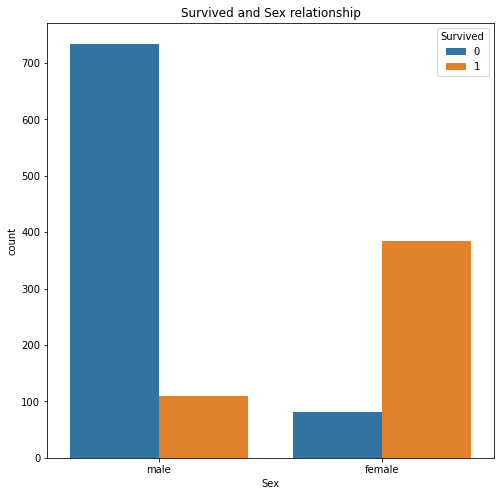

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(x='Sex',hue='Survived',data=df);
plt.title("Survived and Sex relationship");

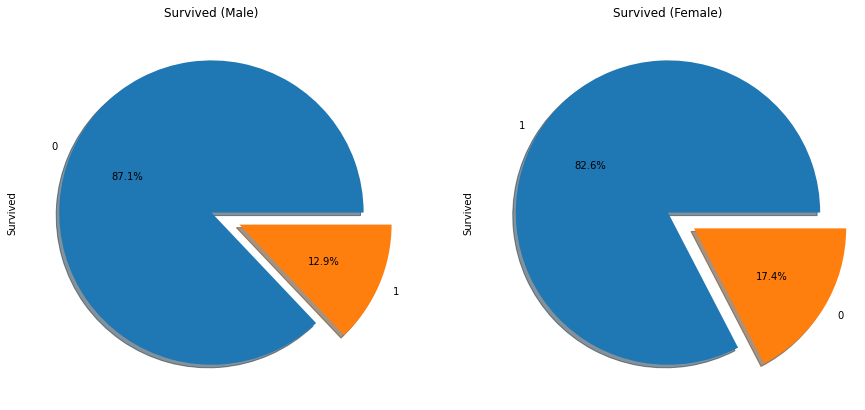

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,ax=ax[0]);
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,ax=ax[1]);
ax[0].set_title('Survived (Male)');
ax[1].set_title('Survived (Female)');

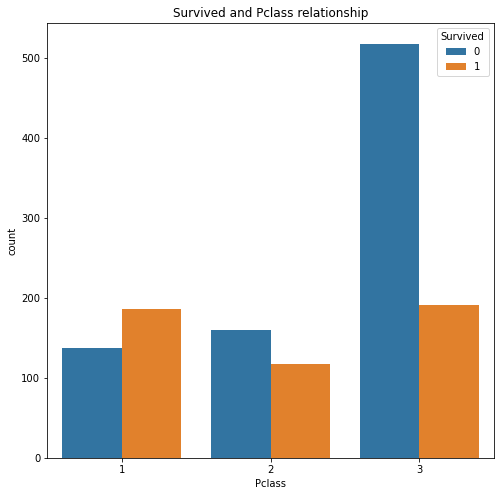

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(x='Pclass',hue='Survived',data=df);
plt.title("Survived and Pclass relationship");

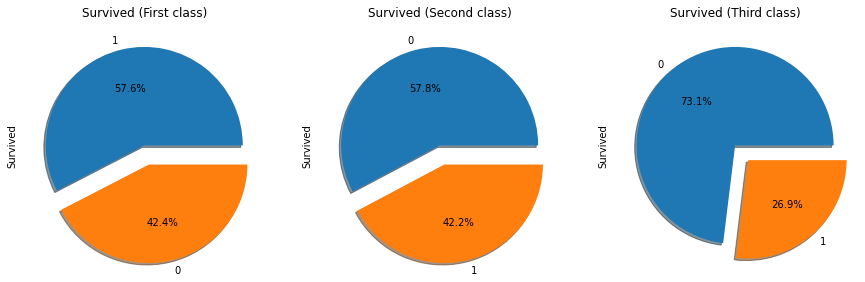

In [22]:
fig,ax=plt.subplots(1,3,figsize=(15,15))
df['Survived'][df['Pclass']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,ax=ax[0]);
df['Survived'][df['Pclass']==2].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,ax=ax[1]);
df['Survived'][df['Pclass']==3].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,ax=ax[2]);
ax[0].set_title('Survived (First class)');
ax[1].set_title('Survived (Second class)');
ax[2].set_title('Survived (Third class)');

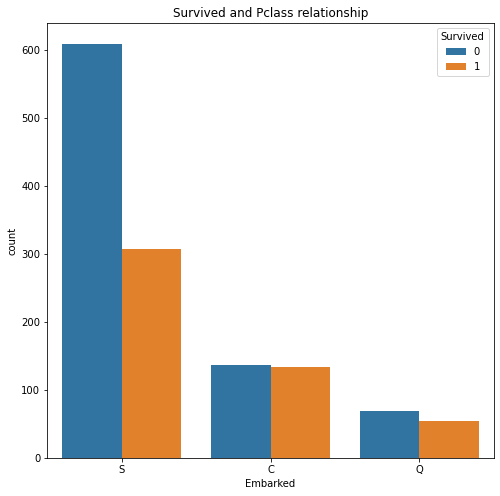

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(x='Embarked',hue='Survived',data=df);
plt.title("Survived and Pclass relationship");

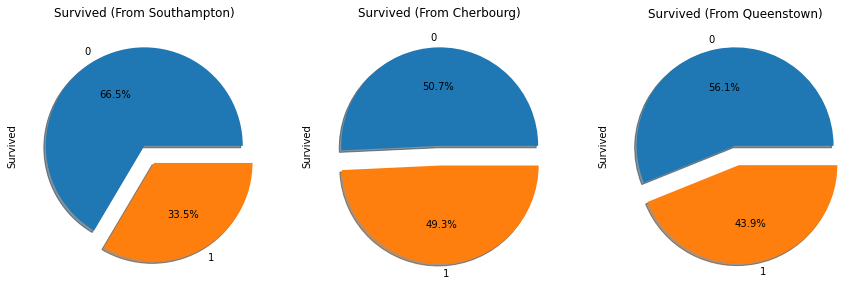

In [24]:
fig,ax=plt.subplots(1,3,figsize=(15,15))
df['Survived'][df['Embarked']=='S'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,ax=ax[0]);
df['Survived'][df['Embarked']=='C'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,ax=ax[1]);
df['Survived'][df['Embarked']=='Q'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,ax=ax[2]);
ax[0].set_title('Survived (From Southampton)');
ax[1].set_title('Survived (From Cherbourg)');
ax[2].set_title('Survived (From Queenstown)');

## Data Preprocessing

Before we build our model we use ```replace()``` to convert string data to numeric data.

In [25]:
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'C': 1, 'Q': 2, 'S':3}},inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
0,0,3,0,22.0,1,0,7.2500,3,2
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,3,1
3,1,1,1,35.0,1,0,53.1000,3,2
4,0,3,0,35.0,0,0,8.0500,3,1


All our data is ready and in integer form.

Using ```corr()``` we can find the correlation of data with each other.

In [26]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
Survived,1.000000,-0.264710,0.688371,-0.045931,0.002370,0.108919,0.233568,-0.135138,0.061090
Pclass,-0.264710,1.000000,-0.124617,-0.372001,0.060832,0.018322,-0.558477,0.185479,0.050027
Sex,0.688371,-0.124617,1.000000,-0.055693,0.109609,0.213125,0.185484,-0.097960,0.188583
Age,-0.045931,-0.372001,-0.055693,1.000000,-0.190514,-0.128351,0.175064,-0.067624,-0.195465
SibSp,0.002370,0.060832,0.109609,-0.190514,1.000000,0.373587,0.160224,0.065567,0.861952
Parch,0.108919,0.018322,0.213125,-0.128351,0.373587,1.000000,0.221522,0.044772,0.792296
Fare,0.233568,-0.558477,0.185484,0.175064,0.160224,0.221522,1.000000,-0.237970,0.226465
Embarked,-0.135138,0.185479,-0.097960,-0.067624,0.065567,0.044772,-0.237970,1.000000,0.067598
FamSize,0.061090,0.050027,0.188583,-0.195465,0.861952,0.792296,0.226465,0.067598,1.000000


I used ```sns.heatmap()``` to generate the heatmap. In this way, we will be able to see the correlation between them more easily.

As seen in cbar, dark colors show a positive correlation and light colors show a negative correlation.

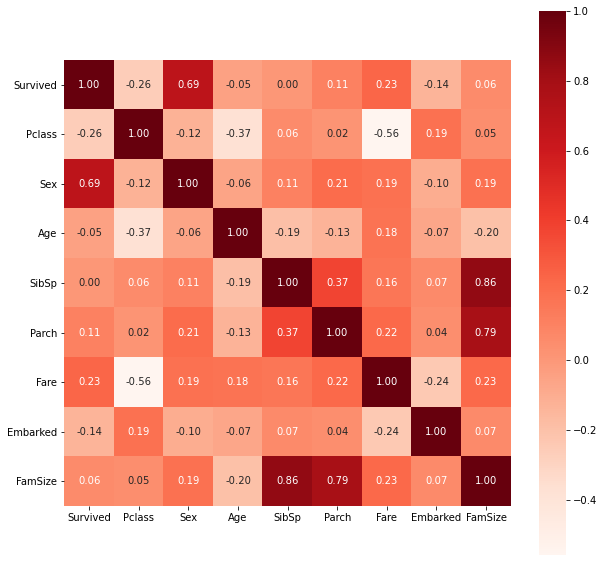

In [27]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,square=True, cbar=True ,fmt='.2f',annot=True,cmap='Reds');

In order to separate **Survived**, our dependent column, from independent columns, we perform the following assignment.

In [28]:
y=df['Survived']
X=df.drop(['Survived'],axis=1)

The numerical value and graph of the Survived column:

0    815
1    494
Name: Survived, dtype: int64

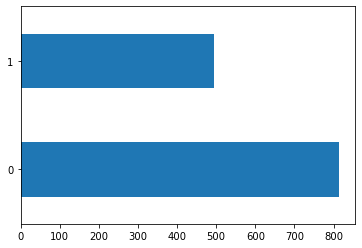

In [29]:
df["Survived"].value_counts().plot.barh();
df["Survived"].value_counts()

Using the ```train_test_split()``` function, we separate the data for our model into train and test.

By typing ```test_size=0.2```, we have reserved 20 percent of our data as the test part.

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

## Model preparation

### Logistic Regression


We built our model using the ```LogisticRegression()``` function ```fit()```.

We train our model with **x_train** and **y_train**.

In [31]:
loj=LogisticRegression(solver ="liblinear")
loj_model =loj.fit(X_train,y_train)

We can think of our model as a function where each column has a coefficient.
We can see the constant term of our model with ```intercept_```, and the coefficients of the columns with ```coef_```.

In [32]:
loj_model.intercept_

array([0.99783655])

In [33]:
loj_model.coef_

array([[-8.68837233e-01,  3.58913414e+00, -2.99801385e-02,
        -5.40023207e-01, -2.67448160e-01,  2.68659565e-03,
        -7.77685190e-02,  1.90365186e-01]])

We use the data we have reserved for testing with the ```predict()``` function to see the predictions our model will make.

In [34]:
loj_pred=loj_model.predict(X_test)
loj_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
      dtype=int64)

```confusion_matrix()``` is a matrix that shows the number of correctness and incorrectness of the predictions made. 

|(1,1) (0,1)| 

|(1,0) (0,0)|

In [35]:
confusion_matrix(y_test,loj_pred)

array([[151,  14],
       [ 23,  74]], dtype=int64)

```accuracy_score()``` gives us the accuracy rate between the prediction we made **(loj_pred)** and the correct results **(y_test)**.

In [36]:
accuracy_score(y_test,loj_pred)

0.8587786259541985

We look at our test error using ```cross_val_score()```. This value gives the accuracy score so that our model can be compared with other models. For a more accurate evaluation, we take 10 of these values and look at the average, and the result is:

In [37]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.8509971509971509

Let's see how our model performs:

In [38]:
print(classification_report(y_test,loj_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       165
           1       0.84      0.76      0.80        97

    accuracy                           0.86       262
   macro avg       0.85      0.84      0.85       262
weighted avg       0.86      0.86      0.86       262

